Twitter sentiment analysis

In [ ]:
import re,csv
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
from textblob import TextBlob
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

loading the dataset

In [ ]:
from google.colab import files
data=files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data=pd.read_csv("/content/drive/Shareddrives/Group No 1/Aaron Sir Project/twitter_data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.columns

Index(['user_id', 'status_id', 'created_at', 'screen_name', 'text', 'source',
       'display_text_width', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'is_retweet', 'favorite_count',
       'retweet_count', 'hashtags', 'symbols', 'urls_url', 'urls_t.co',
       'urls_expanded_url', 'media_url', 'media_t.co', 'media_expanded_url',
       'media_type', 'ext_media_url', 'ext_media_t.co',
       'ext_media_expanded_url', 'ext_media_type', 'mentions_user_id',
       'mentions_screen_name', 'lang', 'quoted_status_id', 'quoted_text',
       'quoted_created_at', 'quoted_source', 'quoted_favorite_count',
       'quoted_retweet_count', 'quoted_user_id', 'quoted_screen_name',
       'quoted_name', 'quoted_followers_count', 'quoted_friends_count',
       'quoted_statuses_count', 'quoted_location', 'quoted_description',
       'quoted_verified', 'retweet_status_id', 'retweet_text',
       'retweet_created_at', 'retweet_source', 'retweet_favorite_count',
    

In [ ]:
data.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,is_retweet,favorite_count,retweet_count,hashtags,symbols,urls_url,urls_t.co,urls_expanded_url,media_url,media_t.co,media_expanded_url,media_type,ext_media_url,ext_media_t.co,ext_media_expanded_url,ext_media_type,mentions_user_id,mentions_screen_name,lang,quoted_status_id,quoted_text,quoted_created_at,quoted_source,quoted_favorite_count,quoted_retweet_count,quoted_user_id,quoted_screen_name,quoted_name,quoted_followers_count,...,retweet_source,retweet_favorite_count,retweet_retweet_count,retweet_user_id,retweet_screen_name,retweet_name,retweet_followers_count,retweet_friends_count,retweet_statuses_count,retweet_location,retweet_description,retweet_verified,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords,status_url,name,location,description,url,protected,followers_count,friends_count,listed_count,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,x53414786,x1108007155251249152,2019-03-19 14:07:46,Actor_Siddharth,I've spoken out against every major political ...,Twitter Web App,279,NaN,NaN,NaN,False,False,10757,2828,CHOWKIDAR BJP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/Actor_Siddharth/status/110...,Siddharth,Dark side of the moon,Indian. Actor. Producer. Musician. Believer. I...,NaN,False,4115243,75,5388,13776,474,2009-07-03 15:33:34,True,NaN,NaN,en,NaN,http://abs.twimg.com/images/themes/theme5/bg.gif,http://pbs.twimg.com/profile_images/1095897454...
1,x21014078,x1108223274222116864,2019-03-20 04:26:33,svaradarajan,Bhakts are thrilled one of the four men arrest...,Twitter Web Client,276,NaN,NaN,NaN,True,False,4490,1681,NaN,NaN,twitter.com/ShefVaidya/sta…,https://t.co/Wb0LMfSURL,https://twitter.com/ShefVaidya/status/11082077...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x19929890,BDUTT,en,x1108207731024945152,"So @BDUTT, when are you going to inform the wo...",2019-03-20 03:24:47,Twitter for iPhone,4442.0,3046.0,x1934388686,ShefVaidya,Shefali Vaidya ஷெஃபாலி வைத்யா शेफाली वैद्य,325977.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/svaradarajan/status/110822...,Siddharth,"New Delhi, India",Founding Editor of The Wire.,https://t.co/yPVMOk3Vw3,False,486943,865,1327,42220,503,2009-02-16 19:02:23,True,https://t.co/yPVMOk3Vw3,http://thewire.in,en,https://pbs.twimg.com/profile_banners/21014078...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1100960124...
2,x207809313,x1108040595434397697,2019-03-19 16:20:39,BJP4India,You may now make #MainBhiChowkidar song as you...,Twitter Web Client,268,NaN,NaN,NaN,False,False,7597,2864,MainBhiChowkidar,NaN,NaN,NaN,NaN,http://pbs.twimg.com/media/D2CM9lKVAAA0w-s.jpg,https://t.co/9YDshjNWyN,https://twitter.com/BJP4India/status/110804059...,photo,http://pbs.twimg.com/media/D2CM9lKVAAA0w-s.jpg,https://t.co/9YDshjNWyN,https://twitter.com/BJP4India/status/110804059...,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA NA,NA NA,NA NA NA NA NA NA NA NA,https://twitter.com/BJP4India/status/110804059...,BJP,"6-A, Deen Dayal Upadhyay Marg,",Official Twitter account of the Bharatiya Jana...,https://t.co/cjXqo5byqb,False,10742860,2,2547,180122,0,2010-10-26 02:19:07,True,https://t.co/cjXqo5byqb,http://www.bjp.org,en,https://pbs.twimg.com/profile_banners/20780931...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8125311080...
3,x876223384639619073,x1108490128702369793,2019-03-20 22:06:56,co

In [ ]:
data['text'][2]

'You may now make #MainBhiChowkidar song as your Caller Tune. \n\n• Dial 57878617 from your Airtel mobile phone.\n\n• Dial 53711116475 from your Vodafone mobile phone.\n\n• Dial 5678911116415 from your Idea mobile phone.\n\n• Jio users can type chowkidar and send SMS to 56789. https://t.co/9YDshjNWyN'

Dropping unwanted columns 

In [ ]:
data.drop(columns=['user_id', 'status_id','reply_to_status_id', 'reply_to_user_id','reply_to_screen_name','symbols','urls_url', 'urls_t.co',
       'urls_expanded_url', 'media_url', 'media_t.co', 'media_expanded_url','media_type', 'ext_media_url', 'ext_media_t.co','ext_media_expanded_url', 'ext_media_type','profile_url', 'profile_expanded_url', 'account_lang',
       'profile_banner_url', 'profile_background_url', 'profile_image_url'],inplace=True)

In [ ]:
data.isna().sum()

created_at            0
screen_name           0
text                  0
source                0
display_text_width    0
                     ..
listed_count          0
statuses_count        0
favourites_count      0
account_created_at    0
verified              0
Length: 65, dtype: int64

Removing special characters

In [ ]:
def remove_symbol(input_text, symbol):
    r = re.findall(symbol, input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
        
    return input_text    

In [ ]:
data['clean_tweet'] = np.vectorize(remove_symbol)(data['text'], "@[\w]*")
data["clean_tweet"] = data['text'].str.replace("[^a-zA-Z#&]", " ")

Tokenizing the tweet

In [ ]:
tokenized_tweet = data['clean_tweet'].apply(lambda x: x.split())
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [I, ve, spoken, out, against, everi, major, po...
1    [bhakt, are, thrill, one, of, the, four, men, ...
2    [you, may, now, make, #mainbhichowkidar, song,...
3    [breakfast, with, chief, chowkidar, in, austra...
4    [see, how, one, of, our, #chowkidar, have, thr...
Name: clean_tweet, dtype: object

In [ ]:
sw_list =['https',
      "airtel",
      "vodafone",
      "mobile",
      "dial",
      "sms",
      "users",
      "caller",
      "hai",
      "pe",
      "aiel",
      "send",
      "im",
      "jio",
      "phone",
      "ke",
      "tune",
      "main",
      "ive","Nirav","arrested","NiravModi"]
from nltk.corpus import stopwords
nltk.download('stopwords')
all_stopwords = stopwords.words('english')
all_stopwords.extend(sw_list)
data['clean_tweet'].apply(lambda x: [item for item in x if item not in all_stopwords])
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data_new=data[['screen_name','text','clean_tweet']].copy()

In [ ]:
data_new

,screen_name,text,clean_tweet
0,Actor_Siddharth,I've spoken out against every major political ...,I spoken every major political party need aros...
1,svaradarajan,Bhakts are thrilled one of the four men arrest...,Bhakts thrilled one four men sending obscene p...
2,BJP4India,You may now make #MainBhiChowkidar song as you...,You may make #MainBhiChowkidar song Caller Tun...
3,commo_nic_ation,Breakfast with chief chowkidar in Australia. F...,Breakfast chief chowkidar Australia Former SBI...
4,PAWANSANAN,See how one of our #Chowkidar have thrashed Pa...,See one #Chowkidar thrashed Pappu supporter mi...
...,...,...,...
107963,sanjayuvacha,@chowkidar_bhan @gunjantheecho @sanjayuvacha S...,chowkidar bhan gunjantheecho sanjayuvacha Sir ...
107964,Sukantakbehera,Your Chowkidar is standing firm &amp; serving ...,Your Chowkidar standing firm &amp serving nati...
107965,KapilPalMeerut,Kaun hai :\n\nJhooth ka Chowkidar ?\n\nFalse p...,Kaun Jhooth ka Chowkidar False promises lakhs ...
107966,RajniGeorge,If you are a chowkidar then tell me \nwhere is...,If chowkidar tell son Najeeb Why Abvp goons Wh...


**Sentiment analysis Using TextBlob**

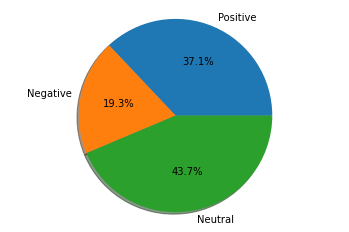

In [ ]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity==0 :
        return 0
    elif analysis.sentiment.polarity<0:
        return -1
data_new['sentiment'] = np.array([ analyze_sentiment(tweet) for tweet in data_new['clean_tweet']])
positive=data.loc[data_new.sentiment==1,'clean_tweet'].count()
negative=data.loc[data_new.sentiment==-1,'clean_tweet'].count()
neutral=data.loc[data_new.sentiment==0,'clean_tweet'].count()

#plot
labels='Positive','Negative','Neutral'
sizes=[positive,negative,neutral]
explode=None
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal') 
plt.show()

**Sentiment Analysis using VADER**

In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 30.4 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()
sentiment_vader = {"Positive":[], "Negative" :[], "Neutral":[], "Compound":[]}
for i in data_new["clean_tweet"]:
    sentiment_vader["Positive"].append(sid_obj.polarity_scores(i)['pos'])
    sentiment_vader["Negative"].append(sid_obj.polarity_scores(i)['neg'])
    sentiment_vader["Neutral"].append(sid_obj.polarity_scores(i)['neu'])
    sentiment_vader["Compound"].append(sid_obj.polarity_scores(i)['compound'])

In [ ]:
data_new.insert(4,"Compound",sentiment_vader['Compound'],True)

In [ ]:
data_new.head()

,screen_name,text,clean_tweet,sentiment,Compound
0,Actor_Siddharth,I've spoken out against every major political ...,I spoken every major political party need aros...,-1,-0.9419
1,svaradarajan,Bhakts are thrilled one of the four men arrest...,Bhakts thrilled one four men sending obscene p...,-1,-0.5106
2,BJP4India,You may now make #MainBhiChowkidar song as you...,You may make #MainBhiChowkidar song Caller Tun...,0,0.0000
3,commo_nic_ation,Breakfast with chief chowkidar in Australia. F...,Breakfast chief chowkidar Australia Former SBI...,0,0.0000
4,PAWANSANAN,See how one of our #Chowkidar have thrashed Pa...,See one #Chowkidar thrashed Pappu supporter mi...,0,-0.1531


In [ ]:
positive=data.loc[data_new.Compound>=0.05,'clean_tweet'].count()
negative=data.loc[data_new.Compound<=-0.05,'clean_tweet'].count()

#plot


In [ ]:
positive

46417

In [ ]:
negative

30957

In [ ]:
neutral=data_new.Compound.count()-(positive+negative)

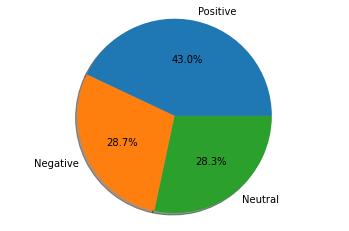

In [ ]:
labels='Positive','Negative','Neutral'
sizes=[positive,negative,neutral]
explode=None
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal') 
plt.show()

Sentiment values for VADER

In [ ]:
def analyze_sentiment(i):
    if i >=0.05:
        return 1
    elif i<0.05 and i>-0.05 :
        return 0
    elif i<-0.05:
        return -1
data_new['sentiment1'] = np.array([ analyze_sentiment(i) for i in data_new['Compound']])

In [ ]:
data_new.head()

,screen_name,text,clean_tweet,sentiment,Compound,sentiment1
0,Actor_Siddharth,I've spoken out against every major political ...,I spoken every major political party need aros...,-1,-0.9419,-1
1,svaradarajan,Bhakts are thrilled one of the four men arrest...,Bhakts thrilled one four men sending obscene p...,-1,-0.5106,-1
2,BJP4India,You may now make #MainBhiChowkidar song as you...,You may make #MainBhiChowkidar song Caller Tun...,0,0.0000,0
3,commo_nic_ation,Breakfast with chief chowkidar in Australia. F...,Breakfast chief chowkidar Australia Former SBI...,0,0.0000,0
4,PAWANSANAN,See how one of our #Chowkidar have thrashed Pa...,See one #Chowkidar thrashed Pappu supporter mi...,0,-0.1531,-1


In [ ]:
data_new1=data_new[['screen_name','text','clean_tweet','sentiment1']].copy()
data_new1

,screen_name,text,clean_tweet,sentiment1
0,Actor_Siddharth,I've spoken out against every major political ...,I spoken every major political party need aros...,-1
1,svaradarajan,Bhakts are thrilled one of the four men arrest...,Bhakts thrilled one four men sending obscene p...,-1
2,BJP4India,You may now make #MainBhiChowkidar song as you...,You may make #MainBhiChowkidar song Caller Tun...,0
3,commo_nic_ation,Breakfast with chief chowkidar in Australia. F...,Breakfast chief chowkidar Australia Former SBI...,0
4,PAWANSANAN,See how one of our #Chowkidar have thrashed Pa...,See one #Chowkidar thrashed Pappu supporter mi...,-1
...,...,...,...,...
107963,sanjayuvacha,@chowkidar_bhan @gunjantheecho @sanjayuvacha S...,chowkidar bhan gunjantheecho sanjayuvacha Sir ...,0
107964,Sukantakbehera,Your Chowkidar is standing firm &amp; serving ...,Your Chowkidar standing firm &amp serving nati...,-1
107965,KapilPalMeerut,Kaun hai :\n\nJhooth ka Chowkidar ?\n\nFalse p...,Kaun Jhooth ka Chowkidar False promises lakhs ...,1
107966,RajniGeorge,If you are a chowkidar then tell me \nwhere is...,If chowkidar tell son Najeeb Why Abvp goons Wh...,-1


Conversion to numeric

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')  # bow bag of words
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(data_new['clean_tweet'])

In [ ]:
bow

<107968x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 1265992 stored elements in Compressed Sparse Row format>

**Classification Model - Random Forest Classifier** 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

X=bow.toarray()
Y=data_new['sentiment']
Y1=data_new1['sentiment1']

***Prediction based on bow of Textblob***

Predicting Output based on Test Data

In [ ]:
# splitting data into training and validation set
xtrain_bow,xtest_bow,ytrain_bow,ytest_bow = train_test_split(X,Y, random_state=42, test_size=0.3)
xtrain_bow, xval_bow, ytrain_bow, yval_bow= train_test_split(xtrain_bow, ytrain_bow, test_size=0.25, random_state=42)
rf= RandomForestClassifier()
rf.fit(xtrain_bow, ytrain_bow) # training the model
ypred_bow=rf.predict(xtest_bow)
print(classification_report(ytest_bow,ypred_bow))
confusion_matrix(ytest_bow,ypred_bow)

              precision    recall  f1-score   support

          -1       0.98      0.90      0.94      6230
           0       0.93      0.98      0.95     14121
           1       0.95      0.94      0.95     12040

    accuracy                           0.95     32391
   macro avg       0.95      0.94      0.94     32391
weighted avg       0.95      0.95      0.95     32391



array([[ 5586,   389,   255],
       [   56, 13771,   294],
       [   61,   691, 11288]])

Predicting output based on validation data

In [ ]:
ypredv_bow=rf.predict(xval_bow)
confusion_matrix(yval_bow,ypredv_bow)
print(classification_report(yval_bow,ypredv_bow))

              precision    recall  f1-score   support

          -1       0.97      0.89      0.93      3583
           0       0.92      0.98      0.95      8298
           1       0.96      0.93      0.95      7014

    accuracy                           0.94     18895
   macro avg       0.95      0.93      0.94     18895
weighted avg       0.95      0.94      0.94     18895



Prediction after VADER

Prediction on test data

In [ ]:
xtrain_bow1,xtest_bow1,ytrain_bow1,ytest_bow1 = train_test_split(X,Y1,random_state=2, test_size=0.3)
xtrain_bow1, xval_bow1, ytrain_bow1, yval_bow1= train_test_split(xtrain_bow1, ytrain_bow1, test_size=0.25, random_state=42)
rf1= RandomForestClassifier()
rf1.fit(xtrain_bow1, ytrain_bow1) # training the model
ypred_bow1=rf1.predict(xtest_bow1)
print(classification_report(ytest_bow1,ypred_bow1))
confusion_matrix(ytest_bow1,ypred_bow1)

              precision    recall  f1-score   support

          -1       0.97      0.90      0.93      9337
           0       0.89      0.95      0.92      9149
           1       0.94      0.94      0.94     13905

    accuracy                           0.93     32391
   macro avg       0.93      0.93      0.93     32391
weighted avg       0.93      0.93      0.93     32391



array([[ 8389,   430,   518],
       [  108,  8663,   378],
       [  160,   617, 13128]])

Prediction on Validation Data

In [ ]:
ypredv_bow1=rf1.predict(xval_bow1)
confusion_matrix(yval_bow1,ypredv_bow1)
print(classification_report(yval_bow1,ypredv_bow1))

              precision    recall  f1-score   support

          -1       0.97      0.90      0.93      5372
           0       0.89      0.94      0.92      5373
           1       0.94      0.94      0.94      8150

    accuracy                           0.93     18895
   macro avg       0.93      0.93      0.93     18895
weighted avg       0.93      0.93      0.93     18895



**Decision Tree Classifier**

Using Textblob

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain_bow, ytrain_bow)
ypred_bowdt=dt.predict(xtest_bow)
print(classification_report(ytest_bow,ypred_bowdt))

              precision    recall  f1-score   support

          -1       0.93      0.90      0.92      6230
           0       0.94      0.95      0.94     14121
           1       0.93      0.93      0.93     12040

    accuracy                           0.93     32391
   macro avg       0.93      0.93      0.93     32391
weighted avg       0.93      0.93      0.93     32391



In [ ]:
ypredv_bowdt=dt.predict(xval_bow)
print(classification_report(yval_bow1,ypredv_bowdt))

              precision    recall  f1-score   support

          -1       0.29      0.19      0.23      5372
           0       0.28      0.44      0.34      5373
           1       0.44      0.37      0.40      8150

    accuracy                           0.34     18895
   macro avg       0.33      0.33      0.32     18895
weighted avg       0.35      0.34      0.34     18895



Using VADER

In [ ]:
dt.fit(xtrain_bow1, ytrain_bow1)
ypred_bowdt1=dt.predict(xtest_bow1)
print(classification_report(ytest_bow1,ypred_bowdt1))

              precision    recall  f1-score   support

          -1       0.92      0.91      0.91      9337
           0       0.89      0.92      0.90      9149
           1       0.93      0.92      0.93     13905

    accuracy                           0.92     32391
   macro avg       0.91      0.92      0.92     32391
weighted avg       0.92      0.92      0.92     32391



In [ ]:
#dt.fit(xtrain_bow1,ytrain_bow1)
print(len(yval_bow))
ypredv_bowdt1=dt.predict(xval_bow1)
print(classification_report(yval_bow1,ypredv_bowdt1))

18895
              precision    recall  f1-score   support

          -1       0.92      0.91      0.91      5372
           0       0.89      0.93      0.91      5373
           1       0.93      0.92      0.93      8150

    accuracy                           0.92     18895
   macro avg       0.91      0.92      0.92     18895
weighted avg       0.92      0.92      0.92     18895



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
nb=GaussianNB()
logistic=LogisticRegression()
svm=SVC()
knn=KNeighborsClassifier()


**Gaussian Naive Bayes**

Using Textblob

On test data

In [ ]:
nb.fit(xtrain_bow, ytrain_bow)
ypred_bownb=nb.predict(xtest_bow)
print(classification_report(ytest_bow,ypred_bownb))

              precision    recall  f1-score   support

          -1       0.63      0.88      0.74      6230
           0       0.87      0.92      0.90     14121
           1       0.94      0.68      0.79     12040

    accuracy                           0.83     32391
   macro avg       0.81      0.83      0.81     32391
weighted avg       0.85      0.83      0.83     32391



On validation data

In [ ]:
ypredv_bownb=nb.predict(xval_bow)
print(classification_report(yval_bow,ypredv_bownb))

              precision    recall  f1-score   support

          -1       0.62      0.87      0.73      3583
           0       0.87      0.92      0.89      8298
           1       0.93      0.68      0.79      7014

    accuracy                           0.82     18895
   macro avg       0.81      0.82      0.80     18895
weighted avg       0.85      0.82      0.82     18895



Using VADER

In [ ]:
nb.fit(xtrain_bow1, ytrain_bow1)
ypred_bownb1=nb.predict(xtest_bow1)
print(classification_report(ytest_bow1,ypred_bownb1))

              precision    recall  f1-score   support

          -1       0.83      0.83      0.83      9337
           0       0.72      0.97      0.83      9149
           1       0.94      0.74      0.83     13905

    accuracy                           0.83     32391
   macro avg       0.83      0.84      0.83     32391
weighted avg       0.85      0.83      0.83     32391



In [ ]:
ypredv_bownb1=nb.predict(xval_bow1)
print(classification_report(yval_bow1,ypredv_bownb1))

              precision    recall  f1-score   support

          -1       0.82      0.82      0.82      5372
           0       0.72      0.96      0.82      5373
           1       0.94      0.73      0.82      8150

    accuracy                           0.82     18895
   macro avg       0.83      0.84      0.82     18895
weighted avg       0.84      0.82      0.82     18895



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,f1_score

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain_sc = sc.fit_transform(xtrain_bow)
Xtest_sc = sc.transform(xtest_bow)

# TEST

Two sample texts are considered 

In [ ]:
txt = "Modi is not a good ruler for the country, though he has done many reforms"

In [ ]:
tx1 = "seems like a happy day to me"

Sample text from the dataset

In [ ]:
##ACTUAL TESTING

In [ ]:
#VADER

In [ ]:
def out(txt):
    words = txt.split()
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    str1 = " "  
    clean_text = (str1.join(stripped))
    analysis = SentimentIntensityAnalyzer()
    score = analysis.polarity_scores(clean_text)
    del score['compound']
    max_value = max(score,key=score.get)
    if max_value=='pos':
        print("Positive text")
    elif max_value=='neu':
        print("Neutral")
    else:
        print("Negative")

In [ ]:
txt2 = "See how one of our #Chowkidar have thrashed Pappu supporter for misleading the country since independence...🙄\n\n#RaGaKaMamaJailMe https://t.co/fVM3iGNUK5"

In [ ]:
out(txt)

Neutral


In [ ]:
out(txt2)

Neutral


In [ ]:
out(tx1)

Positive text


In [ ]:
#Textblob

In [ ]:
def out1(txt):
    words = txt.split()
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    str1 = " "  
    tweet = (str1.join(stripped))
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        print("The text seems to be Positive")
    elif analysis.sentiment.polarity==0 :
        print("Neutral")
    elif analysis.sentiment.polarity<0:
        print("Negative")

In [ ]:
out1(tx1)

The text seems to be Positive


In [ ]:
out1(txt)

The text seems to be Positive


In [ ]:
out1(txt2)

Neutral


Based on the given texts VADER offers a better sentiment classification compared to TextBlob

In [ ]:
out("modi is a bad")

Negative


In [ ]:
out1("Rahul Gandhi is a worst leader")

Negative


In [ ]:
out("Pathetic approach by Modi")

Negative


In [ ]:
out1("no more propanganda #chowkidarchorhai")

Negative
